## POS-Tagging
__Project By__:
- Katkar Prathamesh Shivaji
- Ritesh Singh
- Utkarsh

### Brief
Tagging is a kind of classification that may be defined as the automatic assignment of description to the tokens. Part-of-Speech (PoS) tagging may be defined as the process of assigning one of the parts of speech to the given word. 
### Problem Statement
Develop an AI model to generate the best tag for a given wore.
### Setup
Let's install the requirements first.

In [1]:
!pip install -r requirements.txt

### Let's begin
Let's see some sample data first.

In [2]:
import os
from cfg import config
from bs4 import BeautifulSoup

train_folder_path = config['train_folder_path']
train_folders = os.listdir(train_folder_path)

if train_folders:
    random_folder = os.path.join(train_folder_path, train_folders[0])
    train_files = os.listdir(random_folder)
    if train_files:
        random_file = os.path.join(random_folder, train_files[0])
        with open(random_file) as f:
            data = f.read()
        soup = BeautifulSoup(data, 'xml')
        count = 0
        for tag in soup.find_all('w'):
            count += 1
            print(tag)
            if count > 10:
                break

<w c5="AJ0" hw="crude" pos="ADJ">Crude </w>
<w c5="NN1" hw="justice" pos="SUBST">justice</w>
<w c5="VVB-NN1" hw="deal" pos="VERB">Deal </w>
<w c5="PRP" hw="with" pos="PREP">with </w>
<w c5="NN1" hw="oil" pos="SUBST">oil </w>
<w c5="NN2" hw="spill" pos="SUBST">spills </w>
<w c5="PRP-AVP" hw="in" pos="PREP">in </w>
<w c5="AT0" hw="a" pos="ART">a </w>
<w c5="NN1" hw="way" pos="SUBST">way </w>
<w c5="CJT" hw="that" pos="CONJ">that </w>
<w c5="VVZ" hw="clean" pos="VERB">cleans </w>


__We need to define some important variables:__
- lowercase: Convert all data to lowercase before processing

In [3]:
lowercase = False
output_folder_path = config['output_folder_path']

if not (os.path.exists(output_folder_path) and os.path.isdir(output_folder_path)):
    os.mkdir(output_folder_path)

We need to process and clean the train data before proceeding further.

In [4]:
import corpus_processor
from library import dirWalk

input_folder_path = config['train_folder_path']

file_list = []

output_file_path = os.path.join(output_folder_path,'train-corpus_preprocessed.txt')
file_list = dirWalk(input_folder_path,
                    output_file_path, file_list)

source_file_list = [(file_entry[0] + file_entry[1])
                    for file_entry in file_list]
corpus_processor.process(source_file_list, output_file_path, lowercase)

print('Preprocessing complete')

Preprocessing complete


Let's see some of the preprocessed data

In [5]:
output_file = os.path.join(output_folder_path, 'train-corpus_preprocessed.txt')
with open(output_file) as f:
    for i in range(10):
        data = f.readline().strip()
        print(data)

Crude_AJ0
justice_NN1
Deal_VVB-NN1
with_PRP
oil_NN1
spills_NN2
in_PRP-AVP
a_AT0
way_NN1
that_CJT


Each of these word can occur hundred of times. Counting the frequency of the word tag combination can speed the process.

In [6]:
from library import clean

input_file_path = os.path.join(output_folder_path, 'train-corpus_preprocessed.txt')
with open(input_file_path, 'r') as f:
    preprocessed_list = f.readlines()
trimmed_list = [entry.strip('\n') for entry in preprocessed_list]
del preprocessed_list
train_dictionary = dict()
for entry in trimmed_list:
    if entry not in train_dictionary:
        train_dictionary[entry] = 1
    else:
        train_dictionary[entry] += 1
del trimmed_list
train_dictionary = clean(train_dictionary)

print('Counting word-tag combinations complete')

Counting word-tag combinations complete


Let's see some of the dictionary entries.

In [7]:
count = 0
for key, value in train_dictionary.items():
    count += 1
    if count > 10:
        break
    print(key, ':', value)

Crude_AJ0 : 7.5
justice_NN1 : 381
with_PRP : 61930
oil_NN1 : 915.0
spills_NN2 : 14.0
a_AT0 : 198465
way_NN1 : 8761
that_CJT : 65745.5
cleans_VVZ : 6.5
up_AVP : 17454.5


To understand the distribution of tags and words, let us find out the top 10 words and top 10 tags.

In [8]:
import itertools


words = dict()
tags = dict()

for key, value in train_dictionary.items():
    word, tag = key.split('_')

    if word not in words:
        words[word] = value
    else:
        words[word] = words[word] + value

    if tag not in tags:
        tags[tag] = value
    else:
        tags[tag] = tags[tag] + value
        
sorted_words = {key: value for key, value in sorted(
    words.items(), key=lambda item: item[1], reverse=True)}
sorted_tags = {key: value for key, value in sorted(
    tags.items(), key=lambda item: item[1], reverse=True)}

top_words_list = [key for key in itertools.islice(sorted_words.keys(), 10)]
top_tags_list = [key for key in itertools.islice(sorted_tags.keys(), 10)]

The top 10 tags are:

In [9]:
for tag in top_tags_list:
    print(tag)

NN1
PUN
AT0
PRP
AJ0
NN2
NP0
AV0
PNP
CJC


The top 10 words are:

In [10]:
for tag in top_words_list:
    print(tag)

the
,
.
of
to
and
a
in
is
that


Let us plot some graphs to further understand the dataset.

__Plotting Tags vs Frequency Bar Graph__

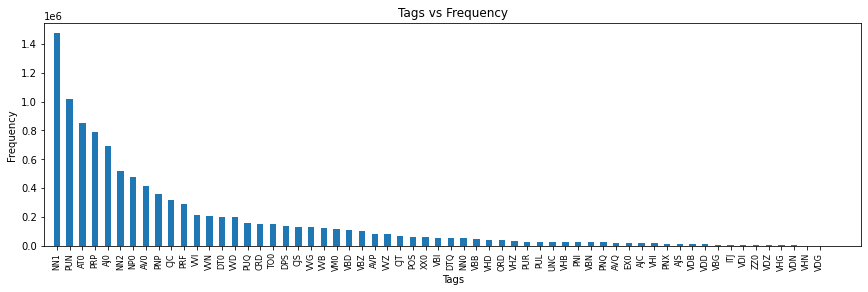

In [11]:
import matplotlib.pyplot as plt

plt.title('Tags vs Frequency')
plt.ylabel('Frequency')
plt.xlabel('Tags')
plt.bar(range(0, len(sorted_tags) * 2, 2), list(sorted_tags.values()),
        align='center', width=1)
plt.xticks(range(0, len(sorted_tags) * 2, 2),
           list(sorted_tags.keys()), rotation=90, fontsize=8)
fig_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(fig_size[0] * 2, fig_size[1] * 1, forward=True)
plt.tight_layout(pad=0.5)
ax = plt.gca()
ax.set_xlim(left=-2)
plt.show()
plt.close()

__Plotting Tags Pie Chart__

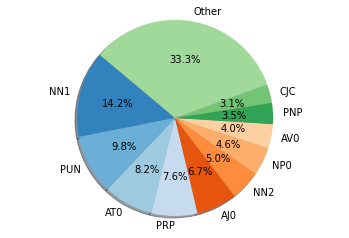

In [12]:
import numpy as np

labels = list(itertools.islice(sorted_tags.keys(), 10))
labels.append('Other')
sizes = list(itertools.islice(sorted_tags.values(), 10))
total = sum(sorted_tags.values())
other_size = total - sum(itertools.islice(sorted_tags.values(), 10))
sizes.append(other_size)

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(11))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.close()

__Plotting Words Pie Chart__

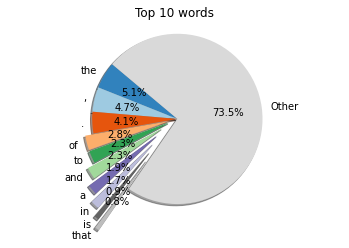

In [13]:
plt.title('Top 10 words')
labels = list(itertools.islice(sorted_words.keys(), 10))
labels.append('Other')
sizes = list(itertools.islice(sorted_words.values(), 10))
total = sum(sorted_words.values())
other_size = total - sum(itertools.islice(sorted_words.values(), 10))
sizes.append(other_size)
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0)
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(11) * 2)
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.close()

Cleanup resources (Don't cleanup unless you don't want to draw above graphs again)

In [14]:
del sorted_words

Let us process the Test data also.

In [15]:
input_folder_path = config['test_folder_path']

file_list = []

output_file_path = os.path.join(output_folder_path,'test-corpus_preprocessed.txt')
file_list = dirWalk(input_folder_path,
                    output_file_path, file_list)

source_file_list = [(file_entry[0] + file_entry[1])
                    for file_entry in file_list]
corpus_processor.process(source_file_list, output_file_path, lowercase)

True

In [16]:
output_file_path = os.path.join(output_folder_path,'test-corpus_preprocessed.txt')

with open(output_file_path, 'r') as f:
    preprocessed_list = f.readlines()
trimmed_list = [entry.strip('\n') for entry in preprocessed_list]
del preprocessed_list
test_dictionary = dict()
for entry in trimmed_list:
    if entry not in test_dictionary:
        test_dictionary[entry] = 1
    else:
        test_dictionary[entry] += 1
del trimmed_list
test_dictionary = clean(test_dictionary)

print('Test data processed.')

Test data processed.


### POS Tagging models

- [__Naive Probablility Model__](#Naive-Probabliity-Model): Jump to Naive Model
- [__HMM Probablility Model__](#HMM-Probabliity-Model): Jump to HMM Model

### Naive Probability Model

Train the model

In [17]:
frequency_map = dict()

for key, value in train_dictionary.items():
    word, tag = key.split('_')

    if word not in frequency_map:
        frequency_map[word] = dict()
        frequency_map[word][tag] = value
    else:
        if tag not in frequency_map[word]:
            frequency_map[word][tag] = value
        else:
            frequency_map[word][tag] += value

for tag_dictionary in frequency_map.values():
    total = sum(tag_dictionary.values())
    for tag in tag_dictionary.keys():
        tag_dictionary[tag] = round(
            tag_dictionary[tag] / total, 7)

tagger_map = dict()
for word, tag_dictionary in frequency_map.items():
    tagger_map[word] = max(tag_dictionary, key=tag_dictionary.get)

Test the model

In [18]:
tagged_words = dict()
best_tag = top_tags_list[0]

for key, value in test_dictionary.items():
    word, expected_tag = key.split('_')

    if key not in tagged_words:
        if word in tagger_map:
            assigned_tag = tagger_map[word]
        elif word.lower() in tagger_map:
            assigned_tag = tagger_map[word.lower()]
        elif word.upper() in tagger_map:
            assigned_tag = tagger_map[word.upper()]
        elif word.capitalize() in tagger_map:
            assigned_tag = tagger_map[word.capitalize()]
        else:
            assigned_tag = best_tag
        tag_dictionary = {
            "word": word,
            "frequency": value,
            "expected_tag": expected_tag,
            "assigned_tag": assigned_tag
        }
        tagged_words[key] = tag_dictionary
    else:
        tagged_words[key]["frequency"] = tagged_words[key]["frequency"] + value

### HMM Probability Model

In [19]:
# HMM model is supposed to be here

### Analysing the model
Generating confusion matrix

In [20]:
import pandas as pd

confusion_matrix = dict.fromkeys(sorted_tags.keys())
for key in confusion_matrix.keys():
    confusion_matrix[key] = dict.fromkeys(sorted_tags.keys(), 0)

for value in tagged_words.values():
    actual_tag = value['expected_tag']
    predicted_tag = value['assigned_tag']
    frequency = value['frequency']
    if predicted_tag in confusion_matrix:
        confusion_matrix[actual_tag][predicted_tag] += frequency

dataframe = pd.DataFrame(confusion_matrix)
dataframe = dataframe.style.background_gradient()

Let's see the dataframe

In [21]:
dataframe

Calculating the accuracy of the model

In [22]:
from library import judge

average_f1_score, weighted_f1_score = judge(confusion_matrix)
print("Average F1 score:", average_f1_score)
print("Weighted F1 score:", weighted_f1_score)

Average F1 score: 0.851826028759796
Weighted F1 score: 0.9048713765307177
